In [1]:
options(repr.plot.width=8, repr.plot.height=5)
install.packages('nycflights13')
library(tidyverse)
library(nycflights13)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Lecture 6: Exploratory data analysis

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will:**
* Learn how to perform [exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (EDA) using the tidyverse and ggplot.
* Understand the correct type(s) of plots for studying:
    - Categorical (discrete) vs. continuous data
    - Variation (in a single) categorical or continuous variable
    - *Co*variation among two or more categorical; or continuous variables
    
This lecture note corresponds to Chapters 11 and 12 of your book.
</div>


    




## What is exploratory data analysis

<img src="https://upload.wikimedia.org/wikipedia/en/e/e9/John_Tukey.jpg" style="margin: 0 0 0 20px; float: right" />

> Procedures for analyzing data, techniques for interpreting the results of such procedures, ways of planning the gathering of data to make its analysis easier, more precise or more accurate, and all the machinery and results of (mathematical) statistics which apply to analyzing data.
>
> “The greatest value of a picture is when it forces us to notice what we never expected to see.” — John Tukey



## What is EDA (book version):

1. Generate questions about your data.
2. Search for answers by visualizing, transforming, and modelling your data.
3. Use what you learn to refine your questions and/or generate new questions.
4. (Return to #1).

Two types of questions are always useful for making discoveries within your data:

- What type of variation occurs within my variables?
- What type of covariation occurs between my variables?

## Continuous vs. Categorical (discrete)
The appropriate visualization will depend on whether the data are:
- *Continuous*: they take on an infinite number of ordered values -typically numerical.
- *Categorical*: they take on one of a small number of values.

## 🤔 Quiz

Continuous or Categorical?: `mpg$manufacturer`

* A. Continuous
* B. Categorical
* C. Could be either

In [2]:
# Find your solution

mpg$manufacturer %>% unique

[1] "audi"       "chevrolet"  "dodge"      "ford"       "honda"     
 [6] "hyundai"    "jeep"       "land rover" "lincoln"    "mercury"   
[11] "nissan"     "pontiac"    "subaru"     "toyota"     "volkswagen"

## 🤔 Quiz

Continuous or Categorical?: `diamonds$price`

* A. Continuous
* B. Categorical
* C. Could be either

In [4]:
# Find your solution
summary(diamonds$price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    326     950    2401    3933    5324   18823 

## Measuring the speed of light
`morley` is a built-in dataset measuring the speed of light.

In [ ]:
print(as_tibble(morley))

# A tibble: 100 × 3
    Expt   Run Speed
   <int> <int> <int>
 1     1     1   850
 2     1     2   740
 3     1     3   900
 4     1     4  1070
 5     1     5   930
 6     1     6   850
 7     1     7   950
 8     1     8   980
 9     1     9   980
10     1    10   880
# … with 90 more rows


In [ ]:
?morley

Here we're measuring the speed of light, an absolute, unchanging, physical constant:

$$c = 299,792,458 \, m/s.$$

But we get a different value with every experiment. Why?

## Visualizing variation in our data

In order to understand how accurately we measured the speed of light, we first need to assess its *variation*. Since the measurement is continuous, we have several options:

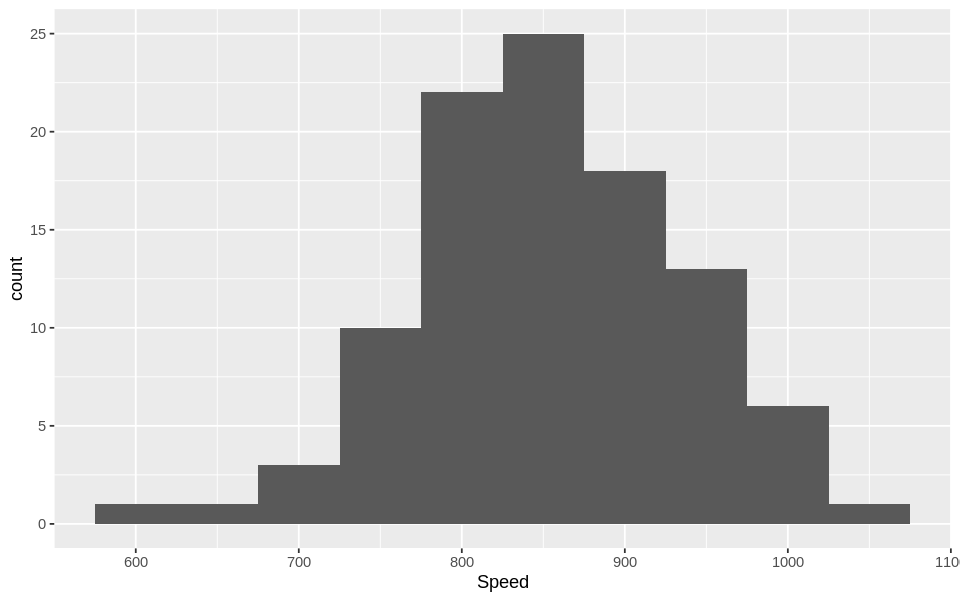

In [7]:
# plot a histogram
ggplot(morley, aes(x=Speed)) +
  geom_histogram(bins = 10)

In [ ]:
?geom_histogram

## Creating a sequence

In [ ]:
seq(600, 1100, 50)

[1]  600  650  700  750  800  850  900  950 1000 1050 1100

Another way of representing this - by segmenting ourselves

In [ ]:
df1 <- morley %>%
  mutate(bin = cut(Speed, breaks = seq(600, 1100, 50))) %>%
    print

In [ ]:
morley$Speed %>% unique

[1]  850  740  900 1070  930  950  980  880 1000  650  760  810  960  940  800
[16]  840  830  790  860  720  620  970  910  870  890  820  770  750  920  780

In [ ]:
df1$bin %>% unique

[1] (800,850]          (700,750]          (850,900]          (1.05e+03,1.1e+03]
[5] (900,950]          (950,1e+03]        (600,650]          (750,800]         
10 Levels: (600,650] (650,700] (700,750] (750,800] (800,850] ... (1.05e+03,1.1e+03]

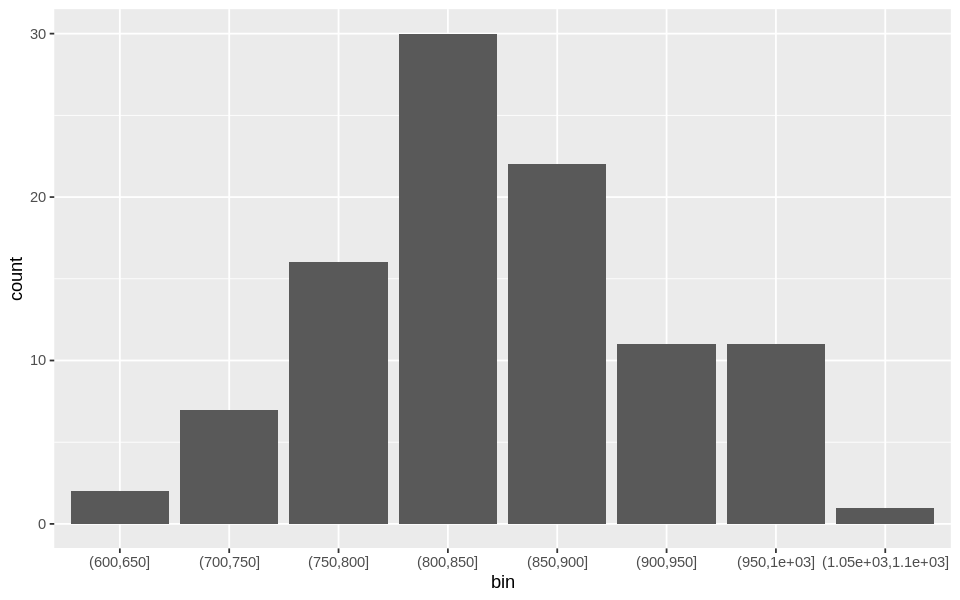

In [ ]:
ggplot(df1, aes(x = bin)) +
  geom_bar()

## Adjusting a histogram
Any dataset can be plotted using multiple different histograms.

There is no one right answer for "how many different bins" -- different values tell different stories about your variable


## Follow-up questions
Now that we can see variation in our data, what sort of follow-up questions should we ask?

- Which values are the most common? Why?

- Which values are rare? Why? Does that match your expectations?

- Can you see any unusual patterns? What might explain them?

## The diamonds dataset
Let's look at a different dataset built into R:

In [ ]:
print(diamonds)

# A tibble: 53,940 × 10
   carat cut       color clarity depth table price     x     y     z
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1  0.23 Ideal     E     SI2      61.5    55   326  3.95  3.98  2.43
 2  0.21 Premium   E     SI1      59.8    61   326  3.89  3.84  2.31
 3  0.23 Good      E     VS1      56.9    65   327  4.05  4.07  2.31
 4  0.29 Premium   I     VS2      62.4    58   334  4.2   4.23  2.63
 5  0.31 Good      J     SI2      63.3    58   335  4.34  4.35  2.75
 6  0.24 Very Good J     VVS2     62.8    57   336  3.94  3.96  2.48
 7  0.24 Very Good I     VVS1     62.3    57   336  3.95  3.98  2.47
 8  0.26 Very Good H     SI1      61.9    55   337  4.07  4.11  2.53
 9  0.22 Fair      E     VS2      65.1    61   337  3.87  3.78  2.49
10  0.23 Very Good H     VS1      59.4    61   338  4     4.05  2.39
# … with 53,930 more rows


This is a dataset of price, quality, and other characteristics for 54k diamonds.

## Unusual values (outliers)
Outliers are "unusual" observations.
- Sometimes they are due to data entry errors.
- Sometimes they are important for other reasons.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


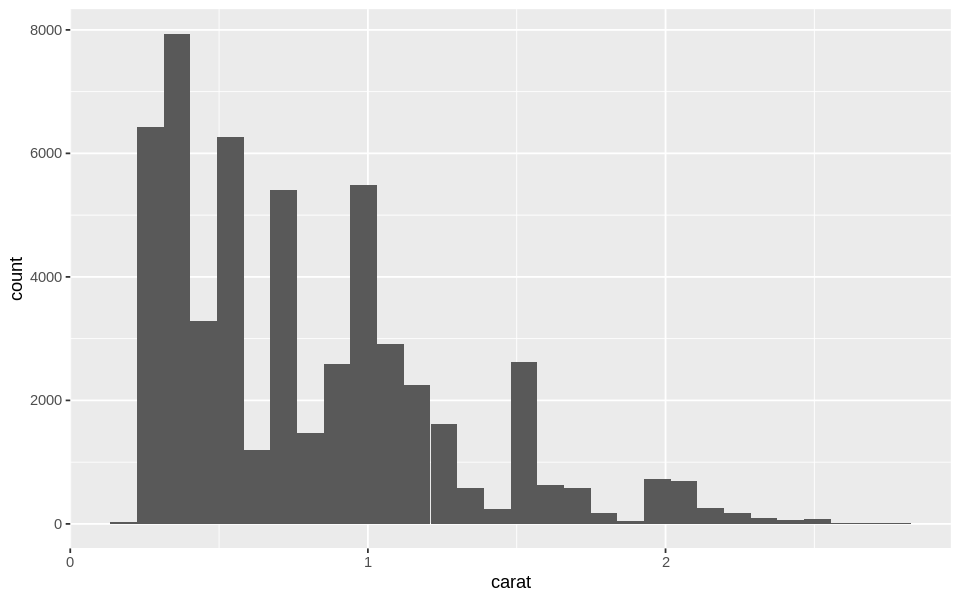

In [10]:
# histogram of carat
diamonds %>% filter(carat < 3) %>% ggplot(aes(x = carat)) +
  geom_histogram()

## 🤔 Quiz

What about outliers? Does this chart show outliers?

* A. Yes
* B. No
  

Another chart to pull the outliers

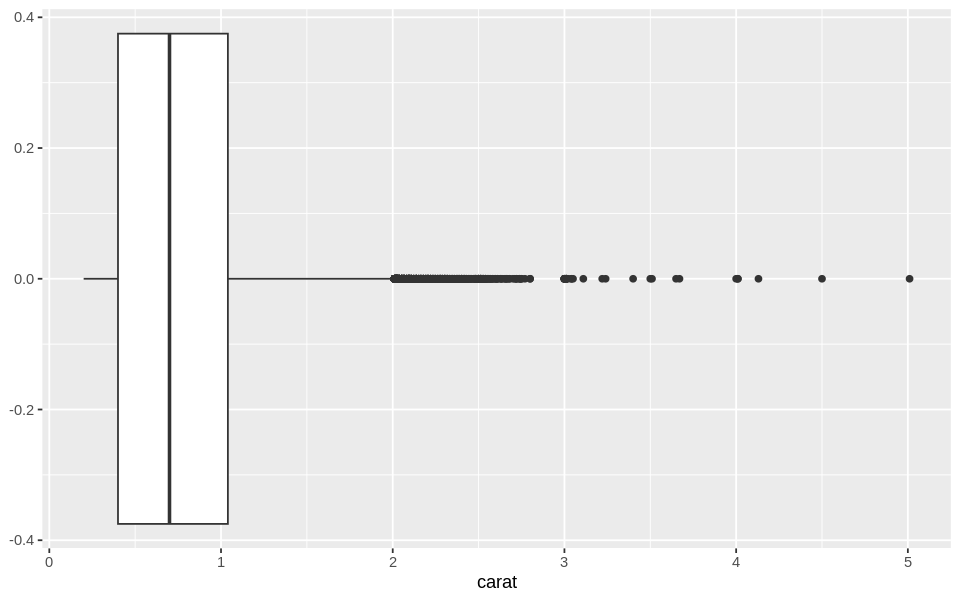

In [12]:
## one more chart
diamonds %>% ggplot(aes(x = carat)) +
  geom_boxplot()

How else can we view the same data that shows different information?

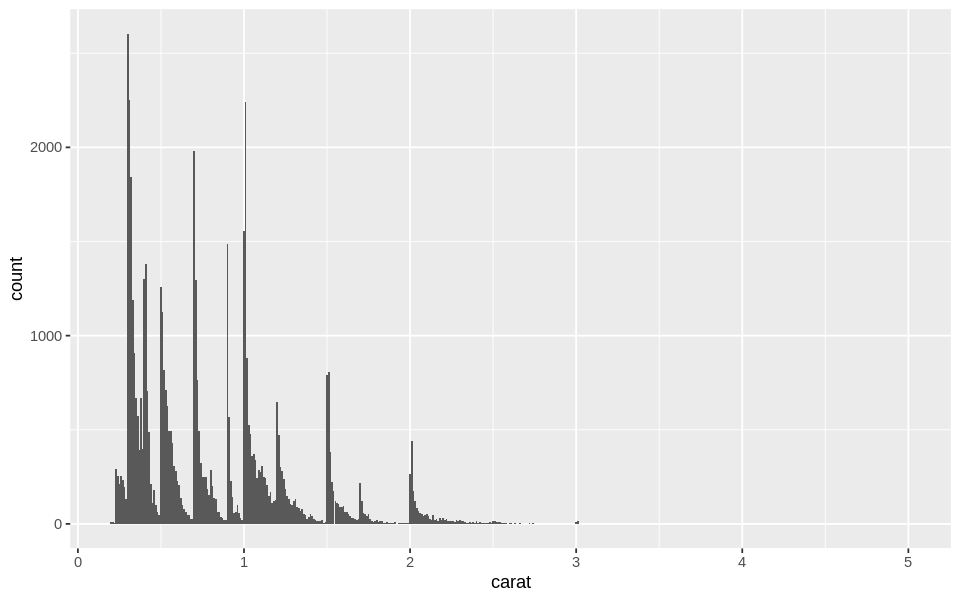

In [ ]:
# more histograms of carat
diamonds %>% ggplot(aes(x = carat)) +
  geom_histogram(binwidth = 0.01)

## Facets

facet_wrap(), splits a plot into subplots that each display one subset of the data based on a categorical variable.

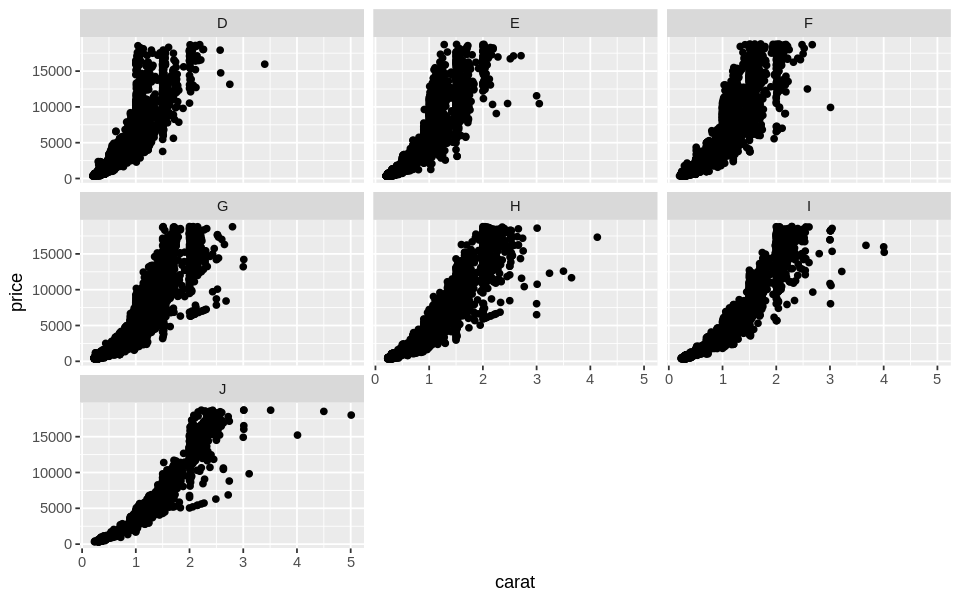

In [14]:
ggplot(diamonds, aes(x = carat, y = price)) +
  geom_point() +
  facet_wrap(~color)

## Pie charts
Many people think you should not use pie charts. The left-hand circle has unit area. How many times larger is the second circle?

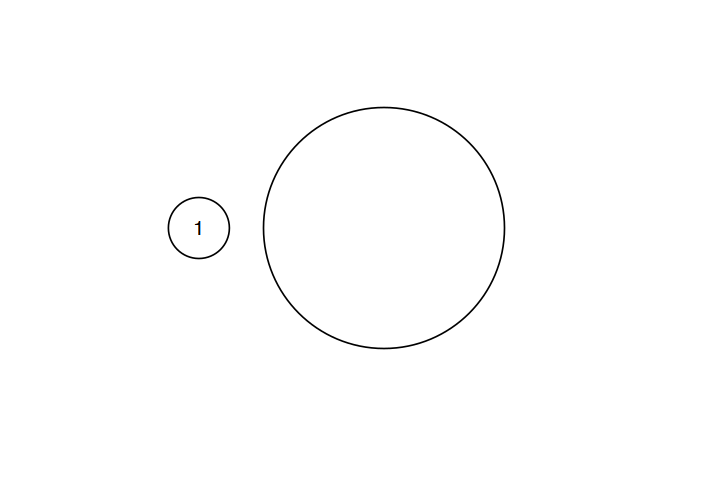

## Categorical variables with many values
Sometimes a categorical variable can take on a lot of values, such that it's not practical to plot its entire distribution. For example:

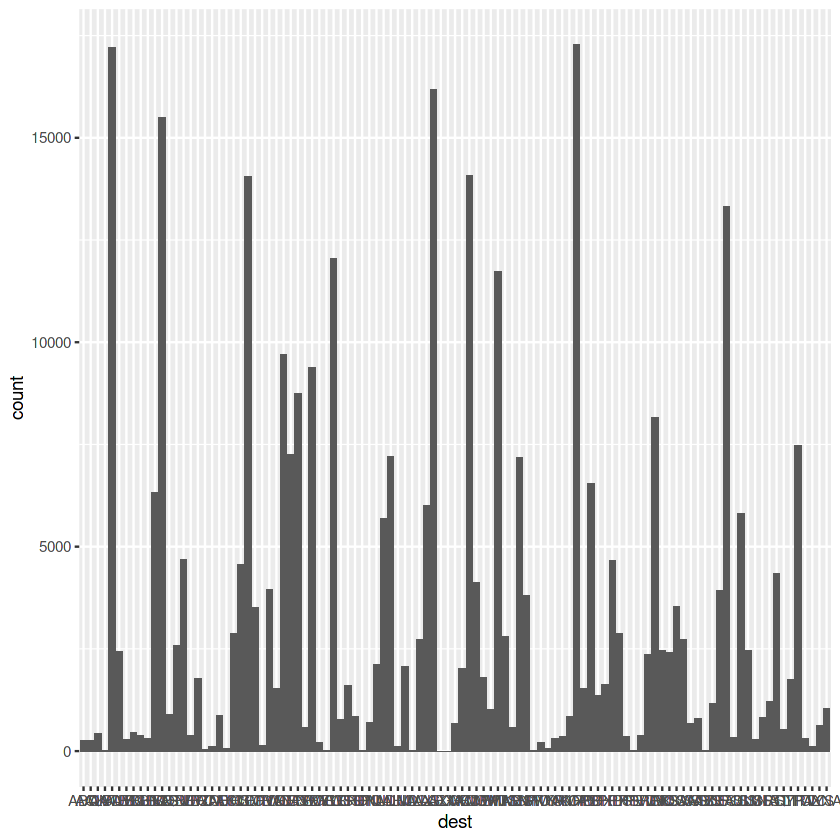

In [ ]:
ggplot(flights) + geom_bar(aes(x = dest))

In this case we can reduce the data in some way, for example, only plotting the most common airports:

Selecting by n


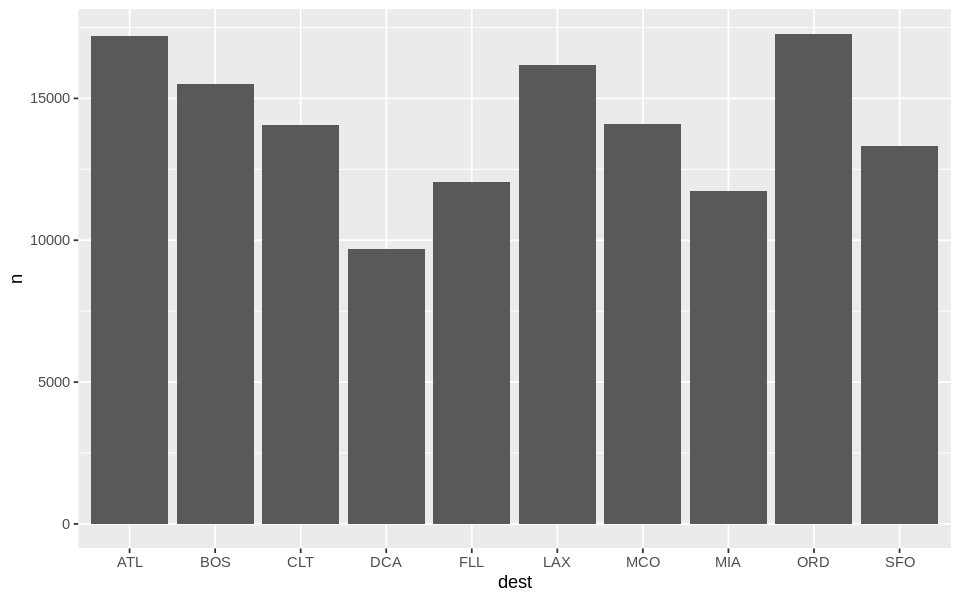

In [15]:

flights %>% count(dest) %>% top_n(10) %>%
  ggplot(aes(x = dest, y = n)) + geom_bar(stat='identity')

(We'll learn more strategies like this when we study categorical data after the midterm.)

## Covariation
**Covariation** is when multiple variables vary together in a similar way. Covariation is everwhere, e.g.:
- Height and weight
- Political preference and religion
- Income this year vs. income last year
- Etc.

One of the best way to spot covariation is to visualize the "joint distribution" of both variables.

When studying covariation among two variables, there are three possibilities, depending on whether the variables are continuous, categorical, or a mixture.

## Continuous and categorical
With one continuous and one categorical variable, there are several choices:
- Box-and-whisker plot
- Multiple/colored histograms

Let's study covariation of `cut` and `price` in the `diamonds` data set.

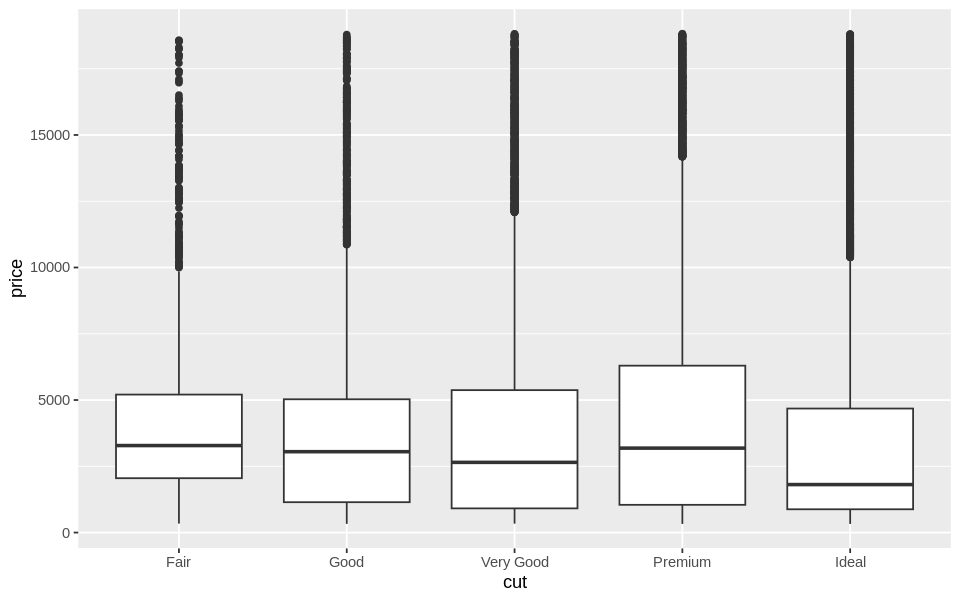

In [16]:
# boxplot cut vs price
diamonds %>% ggplot(aes(x = cut, y = price)) +
  geom_boxplot()

## fct_reorder
If you want to reorder the boxplot based on median value across the cut,  you could use fct_reorder


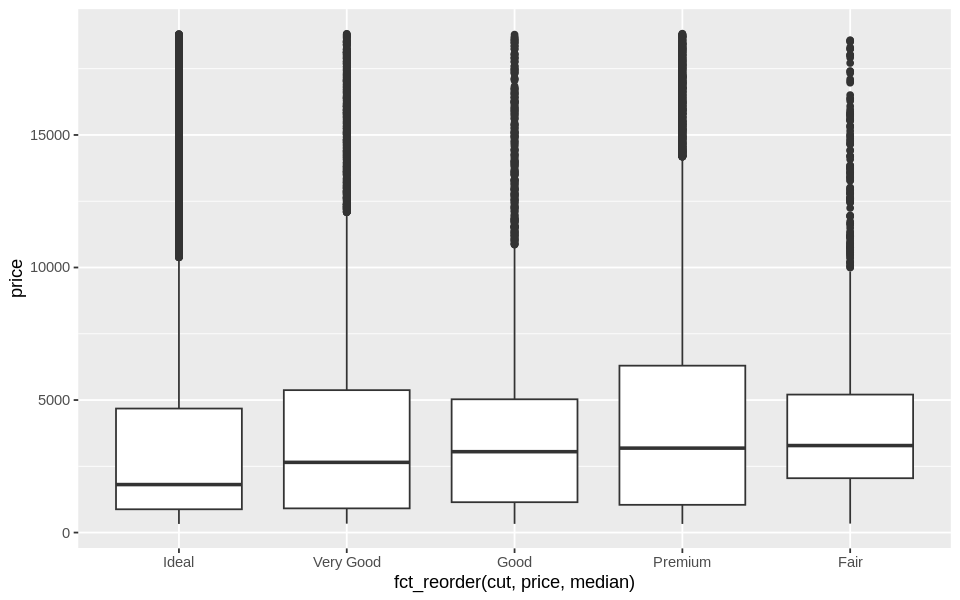

In [17]:
ggplot(diamonds,
       aes(x = fct_reorder(cut, price, median), y = price)) +
          geom_boxplot()

## Two categorical variables
To study covariation between two categorical variables, we can count the number of observations for each combination of values:

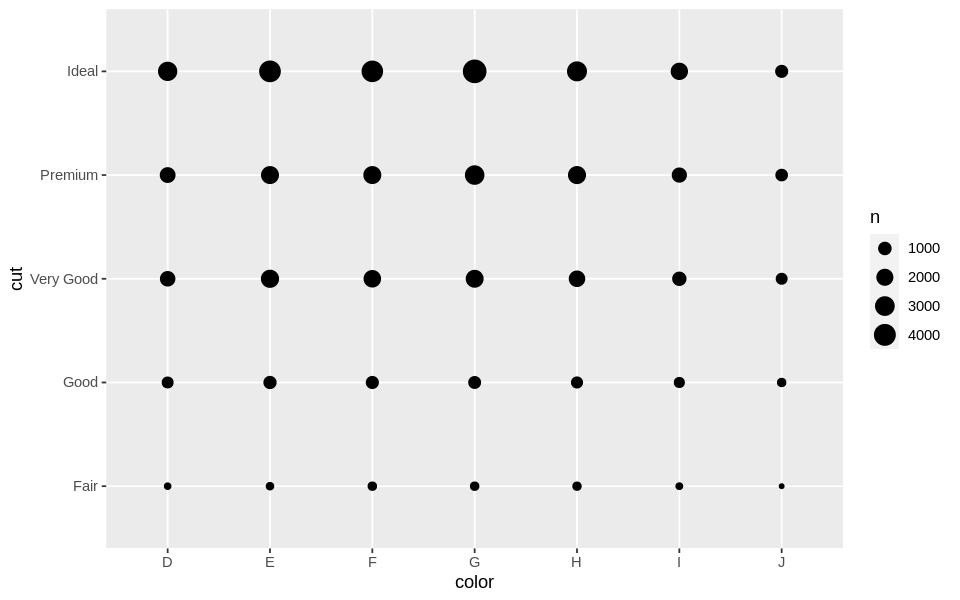

In [ ]:
# geom_count to count the number of values for color and cut
diamonds %>% ggplot(aes(x = color, y = cut)) +
  geom_count()

In [18]:
diamonds %>% count(color, cut)

color,cut,n
<ord>,<ord>,<int>
D,Fair,163
D,Good,662
D,Very Good,1513
D,Premium,1603
D,Ideal,2834
E,Fair,224
E,Good,933
E,Very Good,2400
E,Premium,2337


Another type of plot you will see often (especially in bio) is a heat map:

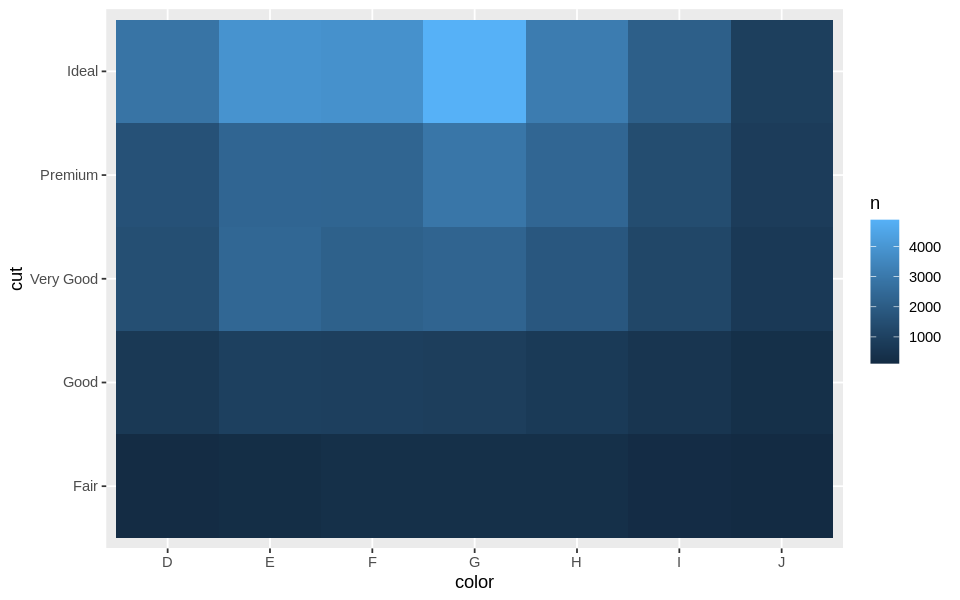

In [ ]:
# geom_tile to count the number of values for color and cut
diamonds %>% count(color, cut) %>%
    ggplot(aes(x = color, y = cut, fill = n)) +
        geom_tile()

In [ ]:
diamonds %>% count(color, cut) %>% print

# A tibble: 35 × 3
   color cut           n
   <ord> <ord>     <int>
 1 D     Fair        163
 2 D     Good        662
 3 D     Very Good  1513
 4 D     Premium    1603
 5 D     Ideal      2834
 6 E     Fair        224
 7 E     Good        933
 8 E     Very Good  2400
 9 E     Premium    2337
10 E     Ideal      3903
# ℹ 25 more rows


## Two continuous variables
Finally, if we're studying the covariation between two continuous variables, we have several options:
- Scatter plot (`geom_point`)
- Binning (`geom_bin2d`/`geom_hex`)
- Contour/bivariate density (`geom_density_2d`)

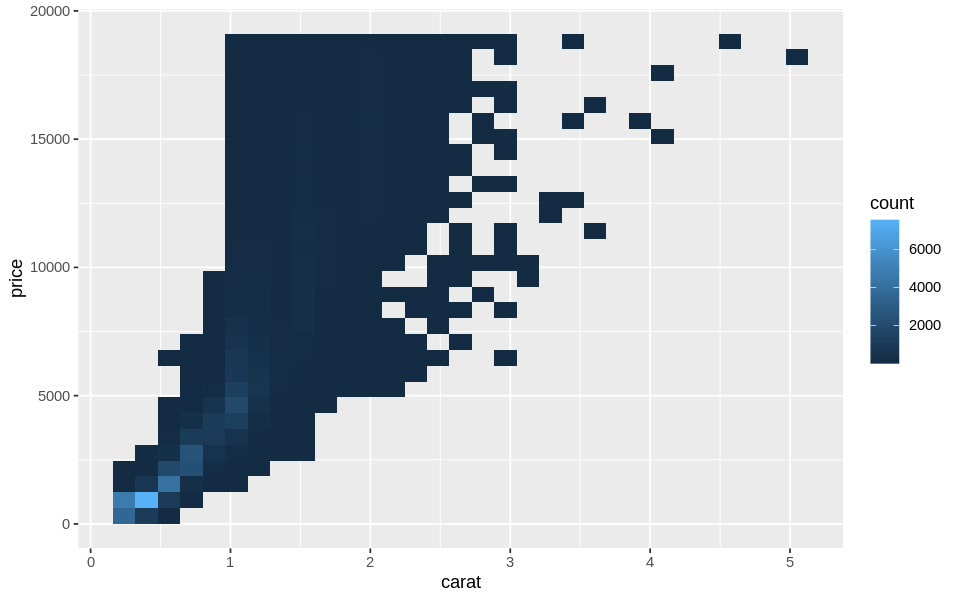

In [19]:
# different geoms for carat vs. price

ggplot(diamonds, aes(x = carat, y = price)) +
  geom_bin2d()

## Millenials
Let's use these techniques to explore a data set released by the [Pew Research Center](https://www.pewsocialtrends.org/2010/02/24/millennials-confident-connected-open-to-change/) on ... millennials!

![millennials](https://images2.minutemediacdn.com/image/upload/c_crop,h_1189,w_2119,x_0,y_225/f_auto,q_auto,w_1100/v1561494201/shape/mentalfloss/586493-istock-862201574.jpg)

In [21]:
load(url('https://datasets.stats306.org/mil.RData'))
mil %>% print

# A tibble: 2,020 × 31
   age   state q1    q8a   q8b   q8c   q8d   q8e   q8f   q8g   q8h   q19   q20  
   <fct> <chr> <fct> <fct> <fct> <fct> <fct> <fct> <fct> <fct> <fct> <fct> <fct>
 1 28    NY    Very… Very… Very… Very… Very… Very… Not … Very… Very… No    NA   
 2 33    NE    Very… Not … One … One … Very… Very… Not … One … One … Yes   Abou…
 3 45    IN    Pret… Some… One … Some… One … Some… Not … Some… Very… Yes   Abou…
 4 66    IN    Very… Very… Very… Very… Very… Some… Not … Very… Very… No    NA   
 5 52    VA    Very… One … Very… Very… One … Some… Not … Very… Very… Yes   Ever…
 6 VOL … MD    Very… Some… One … One … Very… Some… Not … (VOL… Very… Yes   Abou…
 7 60    PA    Pret… Not … One … One … One … One … Not … One … One … No    NA   
 8 54    NC    Not … Very… Very… Very… One … Very… Not … Very… Very… NA    NA   
 9 48    FL    Pret… Some… One … One … One … Very… Not … Very… Very… Yes   Once…
10 48    MO    Pret… Some… Very… Very… One … Very… Not … One … Some… Yes   Once…
# ℹ 2

Each column of the data corresponds to one of the question asked during the survey. You can find the full script [here](https://docs.google.com/file/d/14U2-rS_ljS7kH97PMFqmNMKDwefSL5AS/edit?usp=docslist_api&filetype=msword).

## 🤔 Quiz

What would be a good way to visualize `mil$age`?

<ol style="list-style-type: upper-alpha;">
    <li>Histogram</li>
    <li>Bar plot</li>
    <li>Scatter plot</li>
    <li>Line plot</li>
</ol>

## Social networking

    Q.20	How often do you visit the social networking site you use most often… several times a day, about once a day, every few days, once a week or less often?
    
What sort of variable is this (`mil$q20`)? How should we visualize it?

In [ ]:
summary(mil$q20)

Several times a day         About once a day           Every few days 
                     249                      244                      217 
             Once a week               Less often (VOL) Don't know/Refused 
                     140                      176                        1 
                    NA's 
                     993

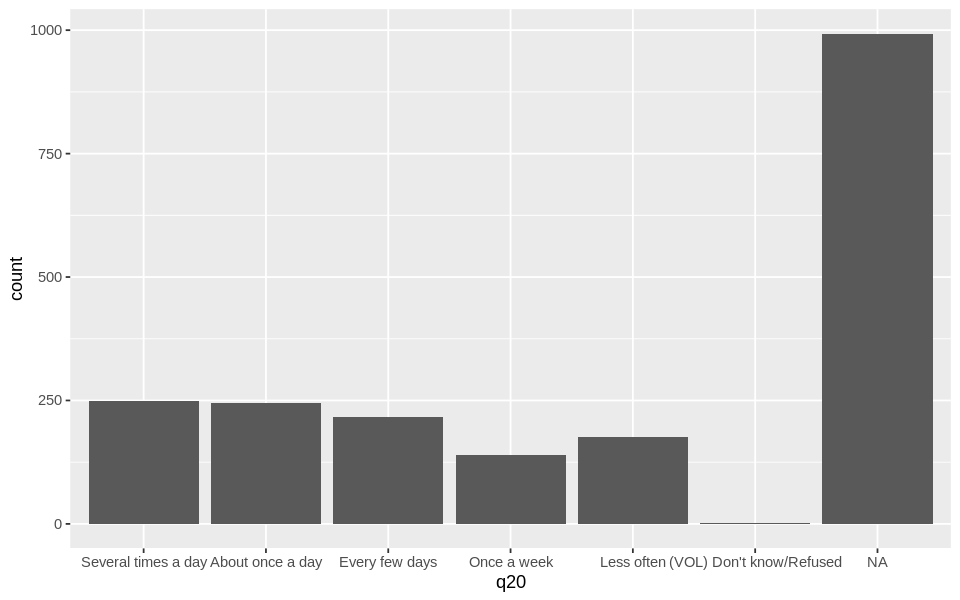

In [31]:
mil %>% ggplot(aes(x = q20)) +
  geom_bar()

In [ ]:
?geom_bar

In [ ]:
# Age and social joint distribution